Title: Finding a better model

Authors: Xi Chen, Lap Pui Chung, Sicheng Yang

Date Created: 1/23/22

Instrutor: Professor Steinwand

Course: COSC 380
_______
This notebook was written for the final project.

The main aim is to create a model that can outperform the model from the research paper (A.K.A trying to achieve an accuracy beyond 83%)


In [87]:
import pandas as pd 
import numpy as np 
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
np.random.seed(888) 

In [88]:
# getting the data 
df = pd.read_csv('COSC380_data.csv')

In [89]:
# transform the dataframe into a format that's analyzable
df = df.T # transpose the dataframe
df = df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True) # move the title to the index column 

In [90]:
df

,Diagnostic,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
0,0.0,10.696879,4.23617,5.345251,7.919187,3.478706,7.142456,4.814028,4.112987,6.948436,...,7.373103,3.232875,5.466897,5.952681,5.102564,5.49959,5.209175,7.569331,6.74773,5.968678
1,1.0,10.560653,4.173343,5.788414,8.180133,3.745022,7.667475,5.254227,4.303188,5.243215,...,7.714989,3.491614,5.597842,6.394273,5.452602,5.669695,4.375323,8.200798,7.133049,6.531528
2,1.0,9.939516,4.559698,5.924607,8.207125,3.630689,7.807055,5.364942,4.498574,5.108143,...,8.707332,3.655863,5.934463,6.547563,5.97831,6.043272,4.88996,8.535591,7.601025,6.540102
3,1.0,10.299866,4.359738,5.583276,8.213886,3.653105,7.5098,5.103016,4.137036,5.450892,...,7.253566,3.333656,5.259695,6.299795,5.622406,5.984586,4.613341,7.427216,7.121853,6.43766
4,1.0,10.467122,4.245888,5.785865,8.184135,3.718874,7.588953,5.233377,4.029887,4.745138,...,7.898104,3.511188,5.409353,6.27696,5.445675,5.611665,4.369342,8.122028,7.201006,6.31612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.0,9.867062,4.347193,6.077813,8.386588,4.069206,7.144349,5.638766,4.329403,4.826731,...,7.786588,3.599751,5.267918,6.524704,5.113098,5.857281,4.359785,7.437855,7.289262,6.378412
183,0.0,9.655055,4.556167,5.856299,8.251081,4.003426,7.345543,5.531227,4.647367,6.8435,...,8.474055,3.606413,5.693594,6.505405,5.403037,5.937764,5.005638,8.12829,7.407037,6.579881
184,0.0,10.072952,4.356708,5.657181,8.118552,3.887196,7.696534,5.335557,4.48411,6.477846,...,8.247335,3.769988,6.173629,6.379607,5.435393,5.575707,5.070739,8.391724,7.29318,6.145892
185,0.0,10.407795,4.37766,5.667295,8.110224,3.713854,7.621459,5.252291,4.241374,6.598051,...,8.028244,3.546674,5.857019,6.226623,5.604968,6.195327,5.160318,8.898482,6.997851,6.451517


In [91]:
# creating a list of genes that the research has identified from the paper
identified_genes = ['203881_s_at','203413_at','209656_s_at','221310_at','209369_at','209267_s_at','210145_at','214146_s_at','218976_at','210397_at','211506_s_at','210168_at','209774_x_at',
'204006_s_at','208892_s_at','202833_s_at','216834_at','202935_s_at','202704_at','201926_s_at','209189_at','201925_s_at','201444_s_at','203908_at','201946_s_at','208654_s_at',
'200760_s_at','201399_s_at','212006_at','210317_s_at','207791_s_at','201689_s_at','204427_s_at','202118_s_at','220199_s_at','217826_s_at','200729_s_at','201635_s_at',
'214007_s_at','221765_at','215628_x_at','207756_at','206056_x_at','207953_at','215208_x_at','215609_at','216858_x_at','204403_x_at','215978_x_at','222104_x_at','208246_x_at',
'208137_x_at','206169_x_at','210679_x_at','215604_x_at','219392_x_at','215600_x_at','217715_x_at','214594_x_at','214715_x_at','218155_x_at','214707_x_at','217679_x_at','215907_at',
'217653_x_at','207730_x_at','219678_x_at','220720_x_at','213089_at','217446_x_at','222358_x_at','215800_at','221191_at','209204_at','215204_at','215385_at','213813_x_at','220389_at','213736_at','222027_at']

In [92]:
# creating features and labels
X_80_genes = df[identified_genes].astype('float')
y = df['Diagnostic'].astype('uint8')

In [93]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_80_genes, y, test_size=0.3, random_state=888)

In [94]:
# making sure the both sides of the label are balanced
y_train.value_counts()

1    67
0    63
Name: Diagnostic, dtype: int64

In [96]:
# disable warning
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
# searching the best parameters for neural network
nn_parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[888]}
nn_clf = MLPClassifier(early_stopping=True) # early stopping was set to true to avoid overfitting 

nn_grid_search = GridSearchCV(nn_clf, nn_parameters, return_train_score=True)

nn_grid_search.fit(X_train, y_train)

print("Best parameters:", nn_grid_search.best_params_)

Best parameters: {'alpha': 0.1, 'hidden_layer_sizes': 11, 'max_iter': 1000, 'random_state': 888, 'solver': 'lbfgs'}


In [ ]:
# searching the best parameters for XGBoost 
xgb_params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

# verbosity=0, use_label_encoder=False to remove warning
xgb_clf = xgb.XGBClassifier(random=888, gamma=10, verbosity=0, use_label_encoder=False)

xgb_tune_clf = RandomizedSearchCV(estimator=xgb_clf,
                         param_distributions=xgb_params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1,)

xgb_tune_clf.fit(X_train, y_train)
print("Best parameters:", xgb_tune_clf.best_params_)

# The output was manually collapsed because it's way too long

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.3, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.5}


In [ ]:
# searching the best parameters for random forest 
forest_param = { 'n_estimators': np.arange(80,150,10),
                'criterion':['gini'],
                'random_state':[888]}
rf_clf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_clf, forest_param, scoring = 'accuracy')
rf_grid_search.fit(X_train, y_train)
print("Best parameters:", rf_grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'n_estimators': 100, 'random_state': 888}


In [ ]:
# searching the best parameters for SVM
svc_param = {'C': [0.1, 1, 10, 100, 1000]}

svc_clf = LinearSVC(random_state=888)
svc_grid_search = GridSearchCV(svc_clf, svc_param, cv=5, scoring='accuracy', verbose=2)
svc_grid_search.fit(X_train, y_train)
print("Best parameters:", svc_grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................................

In [ ]:
# searching the best parameters for logistic regression
logit_param = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

logit_clf = LogisticRegression(random_state=888)
logit_grid_search = GridSearchCV(logit_clf, logit_param, cv=5, scoring='accuracy')
logit_grid_search.fit(X_train, y_train)
print("Best parameters:", logit_grid_search.best_params_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [ ]:
# searching the best parameters for k-nearest neighbor 
knn_param = {'n_neighbors': np.arange(2,30), 'p':[1,2], 'leaf_size':np.arange(20,50,5)}

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_clf, knn_param, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train,y_train)
print("Best parameters:", knn_grid_search.best_params_)

Best parameters: {'leaf_size': 20, 'n_neighbors': 4, 'p': 2}


In [ ]:
# combining SVM, logit, and knn into an ensemble
voting_clf = VotingClassifier(
    estimators=[('lr', logit_grid_search), ('knn', knn_grid_search), ('svc', svc_grid_search)],
    voting='hard')

voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ................................................C=1; total time=   0.0s
[CV] END ...............................................C=10; total time=   0.0s
[CV] END ........................................

VotingClassifier(estimators=[('lr',
                              GridSearchCV(cv=5,
                                           estimator=LogisticRegression(random_state=888),
                                           param_grid={'C': [0.001, 0.01, 0.1,
                                                             1, 10, 100, 1000],
                                                       'penalty': ['l1', 'l2']},
                                           scoring='accuracy')),
                             ('knn',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'leaf_size': array([20, 25, 30, 35, 40, 45]),
                                                       'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                                       'p

### Evaluating the models

In [ ]:
models = [nn_grid_search, xgb_tune_clf, rf_grid_search, svc_grid_search, logit_grid_search, knn_grid_search, voting_clf]
model_names = ['paper accuracy','neural network', 'XGBoost', 'random forests', 'SVM', 'logit', 'kNN', 'voting ensemble']

In [ ]:
# Evaluating the models based on test accuracy 
index = 1
research_accu = 0.83 # original accuracy obtained from the research paper 
model_accu = [research_accu]
for clf in models:
    y_pred = clf.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    model_accu.append(accu)
    print(model_names[index]+':', accu)
    index +=1
assert len(model_accu) <= 8

neural network: 0.7894736842105263
XGBoost: 0.6666666666666666
random forests: 0.7017543859649122
SVM: 0.7192982456140351
logit: 0.7894736842105263
kNN: 0.6491228070175439
voting ensemble: 0.7543859649122807


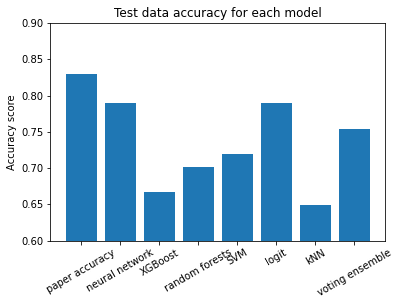

<Figure size 432x288 with 0 Axes>

In [ ]:
# Displaying the accuracy of each model in a bar chart 
plt.bar(range(8), model_accu)
plt.title("Test data accuracy for each model") # add a title
plt.ylim((0.60,0.90))
plt.ylabel("Accuracy score") # label the y-axis
plt.xticks(range(8), model_names, rotation = 30) # label x-axis 
plt.show()
plt.clf()

In [ ]:
# printing out the confusion matrices
index = 1 # skip paper for indexing
for clf in models:
    y_pred = clf.predict(X_test)
    print(model_names[index]+':')
    print(confusion_matrix(y_test, y_pred))
    index +=1

neural network:
[[22  5]
 [ 7 23]]
XGBoost:
[[22  5]
 [14 16]]
random forests:
[[22  5]
 [12 18]]
SVM:
[[20  7]
 [ 9 21]]
logit:
[[22  5]
 [ 7 23]]
kNN:
[[19  8]
 [12 18]]
voting ensemble:
[[21  6]
 [ 8 22]]
